In [1]:
import pandas as pd
import numpy as numpy
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

In [3]:
# Veri setini URL üzerinden indirip bir DataFrame'e yükleme
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data"
columns = [
    "word_freq_make", "word_freq_address", "word_freq_all", "word_freq_3d", "word_freq_our", 
    "word_freq_over", "word_freq_remove", "word_freq_internet", "word_freq_order", "word_freq_mail", 
    "word_freq_receive", "word_freq_will", "word_freq_people", "word_freq_report", "word_freq_addresses", 
    "word_freq_free", "word_freq_business", "word_freq_email", "word_freq_you", "word_freq_credit", 
    "word_freq_your", "word_freq_font", "word_freq_000", "word_freq_money", "word_freq_hp", 
    "word_freq_hpl", "word_freq_george", "word_freq_650", "word_freq_lab", "word_freq_labs", 
    "word_freq_telnet", "word_freq_857", "word_freq_data", "word_freq_415", "word_freq_85", 
    "word_freq_technology", "word_freq_1999", "word_freq_parts", "word_freq_pm", "word_freq_direct", 
    "word_freq_cs", "word_freq_meeting", "word_freq_original", "word_freq_project", "word_freq_re", 
    "word_freq_edu", "word_freq_table", "word_freq_conference", "char_freq_;", "char_freq_(", 
    "char_freq_[", "char_freq_!", "char_freq_$", "char_freq_#", "capital_run_length_average", 
    "capital_run_length_longest", "capital_run_length_total", "is_spam"
]

# Veri setini yükleme
df = pd.read_csv(url, header=None, names=columns)

# İlk birkaç satırı gözden geçirme
df.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,is_spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


UCI Spambase veri setinde, sütunlar e-postaların özelliklerini sayısal olarak tanımlar. Bu sütunlar e-postadaki kelime ve karakterlerin frekansını, ayrıca büyük harf kullanımını içerir. İşte sütunların açıklamaları:

### **Kelime Frekansları (Word Frequencies)**
Bu sütunlar, belirli kelimelerin e-postada kaç kez geçtiğinin yüzdesini ifade eder (her kelime için % oranı).

1. **`word_freq_make`**: "make" kelimesinin frekansı.
2. **`word_freq_address`**: "address" kelimesinin frekansı.
3. **`word_freq_all`**: "all" kelimesinin frekansı.
4. **`word_freq_3d`**: "3d" kelimesinin frekansı.
5. **`word_freq_our`**: "our" kelimesinin frekansı.
6. **`word_freq_over`**: "over" kelimesinin frekansı.
7. **`word_freq_remove`**: "remove" kelimesinin frekansı.
8. **`word_freq_internet`**: "internet" kelimesinin frekansı.
9. **`word_freq_order`**: "order" kelimesinin frekansı.
10. **`word_freq_mail`**: "mail" kelimesinin frekansı.
11. **`word_freq_receive`**: "receive" kelimesinin frekansı.
12. **`word_freq_will`**: "will" kelimesinin frekansı.
13. **`word_freq_people`**: "people" kelimesinin frekansı.
14. **`word_freq_report`**: "report" kelimesinin frekansı.
15. **`word_freq_addresses`**: "addresses" kelimesinin frekansı.
16. **`word_freq_free`**: "free" kelimesinin frekansı.
17. **`word_freq_business`**: "business" kelimesinin frekansı.
18. **`word_freq_email`**: "email" kelimesinin frekansı.
19. **`word_freq_you`**: "you" kelimesinin frekansı.
20. **`word_freq_credit`**: "credit" kelimesinin frekansı.
21. **`word_freq_your`**: "your" kelimesinin frekansı.
22. **`word_freq_font`**: "font" kelimesinin frekansı.
23. **`word_freq_000`**: "000" karakter dizisinin frekansı.
24. **`word_freq_money`**: "money" kelimesinin frekansı.
25. **`word_freq_hp`**: "hp" kelimesinin frekansı.
26. **`word_freq_hpl`**: "hpl" kelimesinin frekansı.
27. **`word_freq_george`**: "george" kelimesinin frekansı.
28. **`word_freq_650`**: "650" karakter dizisinin frekansı.
29. **`word_freq_lab`**: "lab" kelimesinin frekansı.
30. **`word_freq_labs`**: "labs" kelimesinin frekansı.
31. **`word_freq_telnet`**: "telnet" kelimesinin frekansı.
32. **`word_freq_857`**: "857" karakter dizisinin frekansı.
33. **`word_freq_data`**: "data" kelimesinin frekansı.
34. **`word_freq_415`**: "415" karakter dizisinin frekansı.
35. **`word_freq_85`**: "85" karakter dizisinin frekansı.
36. **`word_freq_technology`**: "technology" kelimesinin frekansı.
37. **`word_freq_1999`**: "1999" karakter dizisinin frekansı.
38. **`word_freq_parts`**: "parts" kelimesinin frekansı.
39. **`word_freq_pm`**: "pm" kelimesinin frekansı.
40. **`word_freq_direct`**: "direct" kelimesinin frekansı.
41. **`word_freq_cs`**: "cs" kelimesinin frekansı.
42. **`word_freq_meeting`**: "meeting" kelimesinin frekansı.
43. **`word_freq_original`**: "original" kelimesinin frekansı.
44. **`word_freq_project`**: "project" kelimesinin frekansı.
45. **`word_freq_re`**: "re" kelimesinin frekansı.
46. **`word_freq_edu`**: "edu" kelimesinin frekansı.
47. **`word_freq_table`**: "table" kelimesinin frekansı.
48. **`word_freq_conference`**: "conference" kelimesinin frekansı.

---

### **Karakter Frekansları (Character Frequencies)**
Belirli karakterlerin frekansı, toplam karakter sayısına göre oranlanmıştır.

49. **`char_freq_;`**: ";" karakterinin frekansı.
50. **`char_freq_(`**: "(" karakterinin frekansı.
51. **`char_freq_[`**: "[" karakterinin frekansı.
52. **`char_freq_!`**: "!" karakterinin frekansı.
53. **`char_freq_$`**: "$" karakterinin frekansı.
54. **`char_freq_#`**: "#" karakterinin frekansı.

---

### **Büyük Harf Kullanımı (Capital Letters)**
E-postada büyük harf kullanımını analiz eder.

55. **`capital_run_length_average`**: Büyük harflerin ortalama uzunluğu.
56. **`capital_run_length_longest`**: En uzun büyük harf dizisinin uzunluğu.
57. **`capital_run_length_total`**: Büyük harflerden oluşan toplam uzunluk.

---

### **Hedef Değişken**
58. **`is_spam`**:
   - **Açıklama**: E-postanın spam olup olmadığını belirtir.
   - **Değerler**:
     - `0`: Spam değil.
     - `1`: Spam.

Bu veri seti, e-postaların içerik özelliklerini analiz ederek spam olup olmadıklarını tahmin etmek için kullanılır. Hangi sütunlarla model oluşturmak istediğini belirtirsen, hemen başlayabiliriz! 😊

In [4]:
df

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,is_spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

In [6]:
df.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,is_spam
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


In [8]:
## Veriyi Eğitim ve Test olarak ayarlayalım.

X = df.drop('is_spam', axis=1)
y = df['is_spam']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Eğitim seti boyutu: {X_train.shape}')
print(f'Test seti boyutu: {X_test.shape}')

Eğitim seti boyutu: (3680, 57)
Test seti boyutu: (921, 57)


In [10]:
## Lojistik Regresyon Modelini Eğitimi.

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

## Test seti üğzerinde tahmin yapma.

y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:,1]

d:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [11]:
from sklearn.preprocessing import StandardScaler

## Veriyi Ölçeklendişrme

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Ölçeklendirilmiş veriyi kullanarak modeli eğitme
model = LogisticRegression(max_iter=500)
model.fit(X_train_scaled, y_train)

## Test seti üzerinde tahmin yapma
y_pred = model.predict(X_test_scaled)
y_proba = model.predict_proba(X_test_scaled)[:, 1]

In [12]:
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)
report = classification_report(y_test, y_pred)

print(f'Doğruluk: {accuracy}')
print(f'ROC-AUC: {roc_auc}')
print('Sınıflandırma Raporu:')
print(report)

Doğruluk: 0.9196525515743756
ROC-AUC: 0.9713361340479985
Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       531
           1       0.93      0.87      0.90       390

    accuracy                           0.92       921
   macro avg       0.92      0.91      0.92       921
weighted avg       0.92      0.92      0.92       921



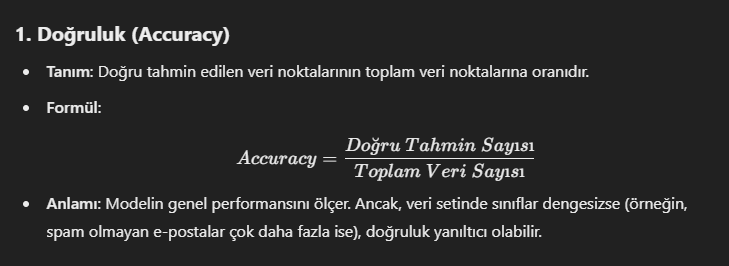
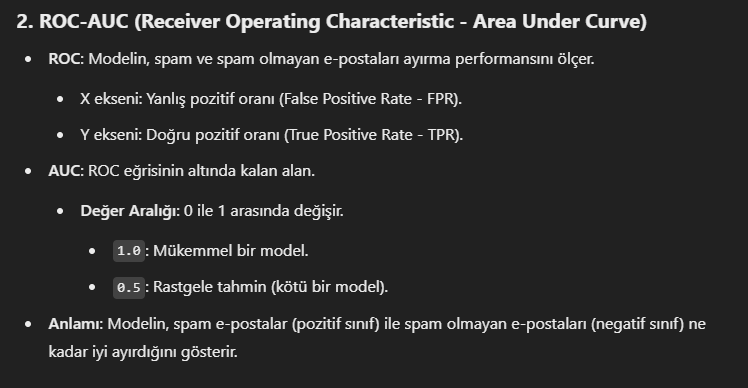
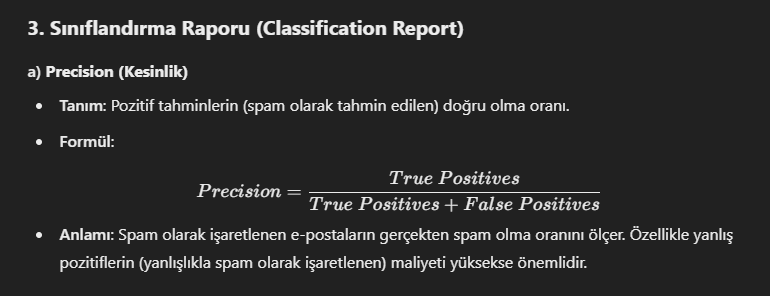
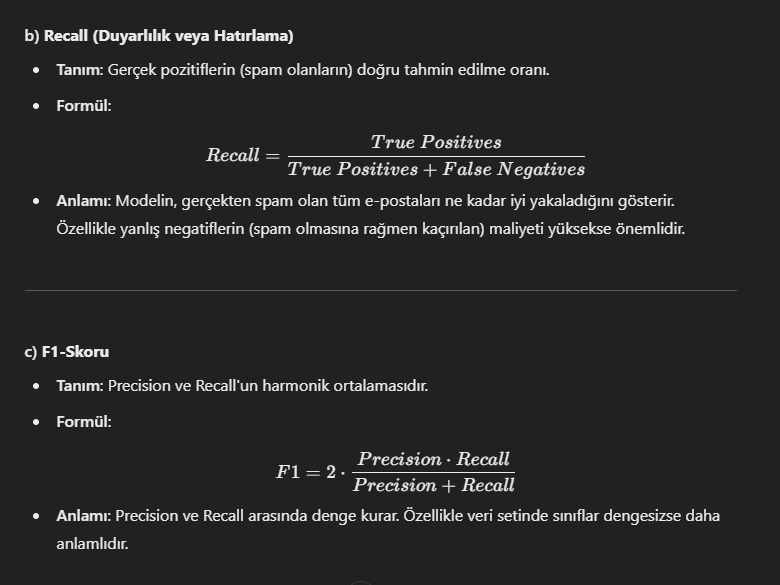
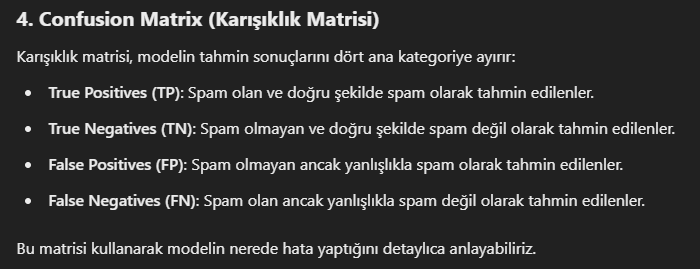

Bu modelde **lojistik regresyon** kullanmamızın sebebi, problemin bir **ikili sınıflandırma (binary classification)** problemi olmasıdır. UCI Spambase veri setinde, her bir e-posta ya **spam** (1) ya da **spam değil** (0) olarak etiketlenmiştir. Lojistik regresyon, bu tür ikili sonuçlar üreten sınıflandırma problemleri için etkili bir yöntemdir. İşte lojistik regresyonu seçmemizin temel nedenleri:

---

### **1. İkili Sınıflandırma İçin Uygunluk**
Lojistik regresyon, bir hedef değişkenin belirli bir sınıfa ait olma olasılığını tahmin eder. Bu durumda:
- Hedef değişkenimiz **`is_spam`**.
  - `0`: Spam değil.
  - `1`: Spam.

Lojistik regresyon, **sigmoid fonksiyonu** kullanarak çıktı üretir. Bu fonksiyon, modelin bir e-postanın spam olma olasılığını tahmin etmesini sağlar ve bu olasılık 0 ile 1 arasında bir değer alır.

---

### **2. Kolay Uygulama ve Hız**
- Lojistik regresyon, **hızlı** ve **hesaplama açısından verimli** bir algoritmadır.
- Veri setimiz büyük bir boyutta olduğu için (57 sütun, binlerce satır), lojistik regresyon karmaşık derin öğrenme yöntemlerinden daha hızlı sonuç verir.

---

### **3. Yorumlanabilirlik**
- Lojistik regresyon, model çıktısını yorumlamak için idealdir.
- Her bir özelliğin hedef üzerindeki etkisini (pozitif veya negatif) **katsayılar (coefficients)** üzerinden anlayabilirsiniz.
- Bu, modelin açıklanabilirliğini artırır, yani hangi kelimelerin veya özelliklerin spam tahmininde daha etkili olduğunu görebiliriz.

---

### **4. Baseline Model Olarak Kullanılabilirlik**
- Lojistik regresyon genellikle bir problemin temel performansını (baseline) görmek için kullanılır. Daha karmaşık modeller (ör. karar ağaçları, rastgele ormanlar veya derin öğrenme) eklemeden önce lojistik regresyon ile sonuçları değerlendiririz.

---

### **5. UCI Spambase Veri Seti İçin İdeal**
Bu veri setinde, e-postanın spam olup olmadığını anlamak için kelime frekansları ve karakteristik özellikler gibi **sürekli sayısal veriler** bulunur. Lojistik regresyon, bu tür veriler üzerinde iyi çalışır ve etkili sonuçlar üretir.

---

Eğer lojistik regresyon yerine başka bir model denemek isterseniz, alternatif yöntemler (örneğin, **Rastgele Orman**, **Destek Vektör Makineleri**, **Derin Öğrenme**) üzerine de konuşabiliriz! 😊

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

In [14]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]

In [15]:
# Performans metriklerini hesapla
accuracy_rf = accuracy_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_proba_rf)
report_rf = classification_report(y_test, y_pred_rf)

print(f"Doğruluk: {accuracy_rf}")
print(f"ROC-AUC: {roc_auc_rf}")
print("Sınıflandırma Raporu:")
print(report_rf)


Doğruluk: 0.9554831704668838
ROC-AUC: 0.9851248249553334
Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       531
           1       0.98      0.92      0.95       390

    accuracy                           0.96       921
   macro avg       0.96      0.95      0.95       921
weighted avg       0.96      0.96      0.96       921



In [18]:
## Özellik önemlerini al

importances = rf_model.feature_importances_

## En önemli özellikleri sıralayalım

feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feature_importances.head(10)) ## En önemli 10 özelliği göster.

                       Feature  Importance
51                 char_freq_!    0.113763
52                 char_freq_$    0.096754
6             word_freq_remove    0.081876
15              word_freq_free    0.067147
55  capital_run_length_longest    0.058521
54  capital_run_length_average    0.057862
56    capital_run_length_total    0.052362
20              word_freq_your    0.046289
24                word_freq_hp    0.042406
18               word_freq_you    0.032907


**Random Forest** modelinin sonuçları oldukça etkileyici görünüyor! Skorları değerlendirelim ve **Lojistik Regresyon** ile karşılaştıralım:

---

### **Skorların Detaylı Analizi**
#### 1. **Doğruluk (Accuracy):**
- **Random Forest**: `0.96` (%96)
- **Lojistik Regresyon**: `0.92` (%92)
- **Yorum**: Random Forest, doğruluk açısından daha iyi performans göstermiş. Test setindeki verilerin %96'sını doğru sınıflandırmış.

#### 2. **ROC-AUC:**
- **Random Forest**: `0.98` (%98)
- **Lojistik Regresyon**: `0.97` (%97)
- **Yorum**: ROC-AUC skoru her iki model için de çok yüksek, ancak Random Forest bir adım önde.

#### 3. **Sınıflandırma Raporu:**

| **Metriğin Adı** | **Sınıf 0** (Spam Değil) | **Sınıf 1** (Spam) | **Macro Avg** | **Weighted Avg** |
|-------------------|--------------------------|---------------------|---------------|------------------|
| **Precision**     | `0.94`                  | `0.98`             | `0.96`        | `0.96`           |
| **Recall**        | `0.98`                  | `0.92`             | `0.95`        | `0.95`           |
| **F1-Score**      | `0.96`                  | `0.95`             | `0.95`        | `0.96`           |

- **Precision (Kesinlik)**:
  - Sınıf 1 için Precision (%98): Random Forest, spam tahminlerini neredeyse tamamen doğru yapıyor. Yani, spam olarak işaretlediği e-postaların büyük çoğunluğu gerçekten spam.
  
- **Recall (Duyarlılık)**:
  - Sınıf 1 için Recall (%92): Spam olan e-postaların %92'sini yakalayabiliyor. Bu, spam olmayanları yanlışlıkla spam olarak işaretleme oranının düşük olduğunu gösteriyor.

- **F1-Skoru**:
  - Hem Sınıf 0 hem de Sınıf 1 için F1-skoru oldukça yüksek (sırasıyla %96 ve %95). Bu, Precision ve Recall arasında iyi bir denge sağlandığını gösterir.

---

### **Lojistik Regresyon ile Karşılaştırma**
- Random Forest, her metrikte **Lojistik Regresyon**'dan daha iyi performans göstermiştir.
- Özellikle **Precision** ve **Recall** metriklerinde daha dengeli bir sonuç elde etmiş.

---

### **Sonuç ve Öneriler**
- **Random Forest**, UCI Spambase veri seti üzerinde oldukça iyi bir performans sergiliyor ve doğru bir seçim.
- Daha fazla iyileştirme için şunları düşünebilirsiniz:
  1. **Parametre Optimizasyonu**: Random Forest'ın parametrelerini (ör. `n_estimators`, `max_depth`) optimize etmek için GridSearchCV veya RandomizedSearchCV gibi yöntemler kullanılabilir.
  2. **Ek Metrikler**: Örneğin, Confusion Matrix ile hataların detayını daha yakından inceleyebiliriz.
  3. **Diğer Algoritmalar**: XGBoost, LightGBM gibi modeller, Random Forest'tan daha hızlı eğitim süreleriyle benzer veya daha iyi sonuçlar verebilir.

Bir sonraki adım için başka bir model denemek veya parametre optimizasyonuna geçmek isterseniz, yardımcı olmaktan mutluluk duyarım! 😊

----

## XGBoost 

In [20]:
pip install xgboost

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.5/124.9 MB 8.2 MB/s eta 0:00:16
    --------------------------------------- 2.9/124.9 MB 8.4 MB/s eta 0:00:15
   - -------------------------------------- 4.7/124.9 MB 8.9 MB/s eta 0:00:14
   -- ------------------------------------- 6.6/124.9 MB 8.8 MB/s eta 0:00:14
   -- ------------------------------------- 8.4/124.9 MB 8.8 MB/s eta 0:00:14
   --- ------------------------------------ 10.2/124.9 MB 8.7 MB/s eta 0:00:14
   --- ------------------------------------ 12.1/124.9 MB 8.8 MB/s eta 0:00:13
   ---- ----------------------------------- 13.9/124.9 MB 8.7 MB/s eta 0:00:13
   ----- ---------------------------------- 15.7/124.9 MB 8.7 MB/s eta 0:00:13
   ----- ---------------------------------- 17.6/124.9 MB 8.7 MB/s eta 0:00:13
   ------ --------------------------------- 19.4/124.9 MB 8.8 MB/s eta 0:00:12
   ------ --------------------------------- 21.5/124.9 MB 8.8 MB/

In [21]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

In [22]:
# XGBoost modeli oluştur
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42, use_label_encoder=False, eval_metric='logloss')

# Modeli eğit
xgb_model.fit(X_train, y_train)

# Test setinde tahmin yap
y_pred_xgb = xgb_model.predict(X_test)
y_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]


ValueError: feature_names must be string, and may not contain [, ] or <

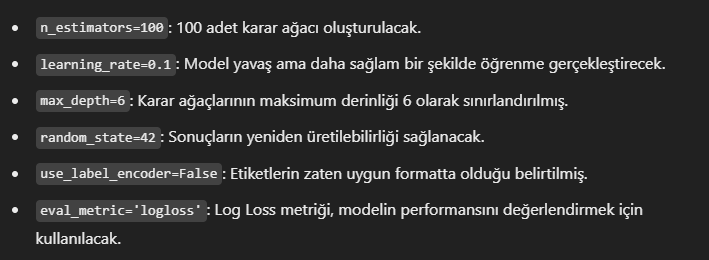

In [23]:
print(type(X_train))
print(X_train.columns if hasattr(X_train, 'columns') else "Sütun isimleri yok")


<class 'pandas.core.frame.DataFrame'>
Index(['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
       'word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_internet', 'word_freq_order', 'word_freq_mail',
       'word_freq_receive', 'word_freq_will', 'word_freq_people',
       'word_freq_report', 'word_freq_addresses', 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you',
       'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
       'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
       'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
       'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
       'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
       'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
       'word_freq_original', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word

In [25]:
# Sütun adlarını temizleme
X_train.columns = [str(col).replace('[', '').replace(']', '').replace('<', '').replace('>', '') for col in X_train.columns]
X_test.columns = [str(col).replace('[', '').replace(']', '').replace('<', '').replace('>', '') for col in X_test.columns]


In [26]:
# XGBoost modeli oluştur
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42, use_label_encoder=False, eval_metric='logloss')

# Modeli eğit
xgb_model.fit(X_train, y_train)

# Test setinde tahmin yap
y_pred_xgb = xgb_model.predict(X_test)
y_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]


d:\Anaconda\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:15:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [27]:
# Performans metriklerini hesapla
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
roc_auc_xgb = roc_auc_score(y_test, y_proba_xgb)
report_xgb = classification_report(y_test, y_pred_xgb)

print(f"Doğruluk: {accuracy_xgb}")
print(f"ROC-AUC: {roc_auc_xgb}")
print("Sınıflandırma Raporu:")
print(report_xgb)


Doğruluk: 0.9543973941368078
ROC-AUC: 0.9878072335699454
Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       531
           1       0.97      0.92      0.94       390

    accuracy                           0.95       921
   macro avg       0.96      0.95      0.95       921
weighted avg       0.95      0.95      0.95       921



In [ ]:
from sklearn.model_selection import GridSearchCV

# Parametre ızgarası
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [4, 6, 8],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0]
}

# GridSearchCV ile parametre optimizasyonu
grid_search = GridSearchCV(
    estimator=XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
    param_grid=param_grid,
    scoring='roc_auc',
    cv=3
)

grid_search.fit(X_train, y_train)



d:\Anaconda\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:15:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Anaconda\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:15:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Anaconda\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:15:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Anaconda\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:15:47] WARNING

En İyi Parametreler: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 200, 'subsample': 0.8}
En İyi ROC-AUC Skoru: 0.9877565025039406


d:\Anaconda\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:16:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [29]:
print(f"En İyi Parametreler: {grid_search.best_params_}")
print(f"En İyi ROC-AUC Skoru: {grid_search.best_score_}")

En İyi Parametreler: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 200, 'subsample': 0.8}
En İyi ROC-AUC Skoru: 0.9877565025039406


In [32]:
# XGBoost modeli oluştur
xgb_model = XGBClassifier(n_estimators=200, learning_rate=0.1, max_depth=4, random_state=42, use_label_encoder=False, eval_metric='logloss')

# Modeli eğit
xgb_model.fit(X_train, y_train)

# Test setinde tahmin yap
y_pred_xgb = xgb_model.predict(X_test)
y_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]


d:\Anaconda\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:21:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [33]:
# Performans metriklerini hesapla
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
roc_auc_xgb = roc_auc_score(y_test, y_proba_xgb)
report_xgb = classification_report(y_test, y_pred_xgb)

print(f"Doğruluk: {accuracy_xgb}")
print(f"ROC-AUC: {roc_auc_xgb}")
print("Sınıflandırma Raporu:")
print(report_xgb)


Doğruluk: 0.9587404994571118
ROC-AUC: 0.9878555217538268
Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       531
           1       0.97      0.93      0.95       390

    accuracy                           0.96       921
   macro avg       0.96      0.96      0.96       921
weighted avg       0.96      0.96      0.96       921



In [34]:
feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': xgb_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(feature_importances.head(10))


                       Feature  Importance
52                 char_freq_$    0.320916
51                 char_freq_!    0.104648
6             word_freq_remove    0.103865
24                word_freq_hp    0.042418
26            word_freq_george    0.031373
23             word_freq_money    0.027399
20              word_freq_your    0.027312
45               word_freq_edu    0.023006
15              word_freq_free    0.022504
54  capital_run_length_average    0.020319
